# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fachri Hidayah Maliki Saddam
- **Email:** fachridmob@gmail.com
- **ID Dicoding:** fachrihms

## Menentukan Pertanyaan Bisnis

- Produk dengan kategori apa yang menghasilkan revenue terbesar?
- Customer lebih sering menggunakan metode pembayaran apa?
- Berapa revenue yang dihasilkan dari setiap metode pembayaran?
- Beberapa tahun terakhir (2018-2017) customer lebih sering membeli kategori produk apa saja?

## Import Semua Packages/Library yang Digunakan

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

## Data Wrangling

### Gathering Data

In [52]:
customers_df = pd.read_csv("data\customers_dataset.csv")
customers_df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\FACHRI H\AppData\Local\Temp\ipykernel_4268\2398228363.py:1: SyntaxWarning: invalid escape sequence '\c'
  customers_df = pd.read_csv("data\customers_dataset.csv")


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [53]:
items_df = pd.read_csv("data\order_items_dataset.csv")
items_df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\FACHRI H\AppData\Local\Temp\ipykernel_4268\90568455.py:1: SyntaxWarning: invalid escape sequence '\o'
  items_df = pd.read_csv("data\order_items_dataset.csv")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [54]:
payments_df = pd.read_csv("data\order_payments_dataset.csv")
payments_df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\FACHRI H\AppData\Local\Temp\ipykernel_4268\1481990212.py:1: SyntaxWarning: invalid escape sequence '\o'
  payments_df = pd.read_csv("data\order_payments_dataset.csv")


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [55]:
products_df = pd.read_csv("data\products_dataset.csv")
products_df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\FACHRI H\AppData\Local\Temp\ipykernel_4268\3676178298.py:1: SyntaxWarning: invalid escape sequence '\p'
  products_df = pd.read_csv("data\products_dataset.csv")


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [56]:
products_df_english = pd.read_csv("data\product_category_name_translation.csv")
products_df_english.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\FACHRI H\AppData\Local\Temp\ipykernel_4268\3563543462.py:1: SyntaxWarning: invalid escape sequence '\p'
  products_df_english = pd.read_csv("data\product_category_name_translation.csv")


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [57]:
orders_df = pd.read_csv("data\orders_dataset.csv")
orders_df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\FACHRI H\AppData\Local\Temp\ipykernel_4268\2113478448.py:1: SyntaxWarning: invalid escape sequence '\o'
  orders_df = pd.read_csv("data\orders_dataset.csv")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


**Insight:**
- Memuat 5 tabel dan memperoleh informasi dari setiap tabel yang nantinya siap untuk dibersihkan dan dianalisis

### Assessing Data

In [58]:
# customers_df.info()
print("Jumlah Duplikasi: ", customers_df.duplicated().sum())
customers_df.isna().sum()

Jumlah Duplikasi:  0


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [59]:
print("Jumlah Duplikasi: ", items_df.duplicated().sum())
# items_df.info()
# items_df.describe()
items_df.isna().sum()

Jumlah Duplikasi:  0


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [60]:
payments_df.describe()
print("Jumlah Duplikasi: ", payments_df.duplicated().sum())
payments_df.isna().sum()

Jumlah Duplikasi:  0


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [61]:
print("Jumlah Duplikasi: ", products_df.duplicated().sum())
products_df.isna().sum()

Jumlah Duplikasi:  0


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [62]:
print("Jumlah Duplikasi: ", orders_df.duplicated().sum())
orders_df.isna().sum()

Jumlah Duplikasi:  0


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**

Terdapat 610 missing values pada tabel product di kolom: 
- product_category_name
- product_name_lenght           
- product_description_lenght    
- product_photos_qty
        
product_category_name masih berbahasa Spanyol yang nantinya akan diubah ke bahasa Inggris

dan juga terdapat missing values pada tabel orders di kolom:
- order_approved_at sebanyak 160
- order_delivered_carrier_date sebanyak 1783
- order_delivered_customer_date sebanyak 2965


yang harus dibersihkan untuk mempertajam hasil analisis

### Cleaning Data

In [63]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [64]:
products_df.dropna(axis=0,inplace=True)

In [65]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [66]:
merged_products_df = products_df.merge(products_df_english, on='product_category_name', how='left')
merged_products_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,furniture_decor
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0,home_appliances
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0,toys


In [67]:
merged_products_df['product_category_name'] = merged_products_df['product_category_name_english']
merged_products_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,musical_instruments,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,furniture_decor,56.0,184.0,2.0,900.0,40.0,8.0,40.0,furniture_decor
8,37cc742be07708b53a98702e77a21a02,home_appliances,57.0,163.0,1.0,400.0,27.0,13.0,17.0,home_appliances
9,8c92109888e8cdf9d66dc7e463025574,toys,36.0,1156.0,1.0,600.0,17.0,10.0,12.0,toys


In [68]:
# Spanyol -> English
merged_products_df.drop(columns='product_category_name_english')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32335,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32336,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32337,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32338,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [69]:
merged_products_df.to_csv('updated_lang_products.csv',index=True)

**Insight:**

Pada tabel products terdapat missing values pada kolom product_category_name, product_name_lenght	,product_description_lenght, product_photos_qty

- Menurut saya missing values disini tidak relevan karena produk tersebut tidak diketahui bentuknya seperti apa walaupun ada keterangan weight, height, length namun name, category, photos, dan descriptionnya tidak terisi sehingga barangnya kurang valid untuk dianalisis

- product_category_name masih berbahasa spanyol pada products_df sehingga dilakukan merge dengan tabel product_category_name_translation dan diperoleh dataframe baru yaitu merged_products_df dimana product_category_name yang asalnya berbahasa Spanyol sekarang sudah berbahasa Inggris agar bisa dimengerti orang banyak.

Pada tabel orders ini missing values pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date bukan berarti datanya tidak valid, kemungkinan:
- barang masih di proses dipihak seller 
- barang sedang dalam proses pengiriman 
- barang masih dalam masa pembayaran 
- barang dicancel tidak jadi dibeli
- tidak terdapat keterangan lanjutan (unavailable)

## Exploratory Data Analysis (EDA)

### Explore ...

In [70]:
items_products_df = pd.merge(
    left= items_df,
    right=merged_products_df,
    how='left',
    left_on= "product_id",
    right_on= "product_id"
)
items_products_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,housewares,36.0,558.0,1.0,450.0,24.0,8.0,15.0,housewares
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,telephony,52.0,815.0,1.0,200.0,27.0,5.0,20.0,telephony
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,garden_tools,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0,garden_tools
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,health_beauty,59.0,493.0,1.0,2000.0,30.0,12.0,16.0,health_beauty
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,books_technical,52.0,1192.0,1.0,850.0,29.0,3.0,21.0,books_technical


In [71]:
items_products_df['product_category_name'] = items_products_df['product_category_name_english']
items_products_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,housewares,36.0,558.0,1.0,450.0,24.0,8.0,15.0,housewares
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,telephony,52.0,815.0,1.0,200.0,27.0,5.0,20.0,telephony
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,garden_tools,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0,garden_tools
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,health_beauty,59.0,493.0,1.0,2000.0,30.0,12.0,16.0,health_beauty
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,books_technical,52.0,1192.0,1.0,850.0,29.0,3.0,21.0,books_technical


In [72]:
items_products_df.drop(columns='product_category_name_english')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [73]:
items_products_df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000,111046.000000
mean,1.197834,120.653739,19.990320,48.775877,787.866335,2.209706,2099.979657,30.211003,16.626362,23.041956
std,0.705124,183.633928,15.806405,10.025570,652.138503,1.721445,3754.785226,16.189352,13.467460,11.716659
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [74]:
selected_columns = items_products_df[['product_id', 'product_category_name','price']]
most_revenue = selected_columns.sort_values(by="price", ascending=False)
print("Jumlah Duplikasi: ", most_revenue.duplicated().sum())
most_revenue

Jumlah Duplikasi:  70242


,product_id,product_category_name,price
3556,489ae2aa008f021502940f251d4cce7f,housewares,6735.00
112233,69c590f7ffc7bf8db97190b6cb6ed62e,computers,6729.00
107841,1bdf5e6731585cf01aa8169c7028d6ad,art,6499.00
74336,a6492cc69376c469ab6f61d8f44de961,small_appliances,4799.00
11249,c3ed642d592594bb648ff4a04cee2747,small_appliances,4690.00
...,...,...,...
57300,05b515fdc76e888aada3c6d66c201dff,health_beauty,1.20
57307,05b515fdc76e888aada3c6d66c201dff,health_beauty,1.20
48625,8a3254bee785a526d548a81a9bc3c9be,construction_tools_construction,0.85
27652,8a3254bee785a526d548a81a9bc3c9be,construction_tools_construction,0.85


In [91]:
most_revenue_analyzed = most_revenue.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "price": "sum"
}).sort_values(by="price", ascending=False).head(10).reset_index()
most_revenue_analyzed

,product_category_name,product_id,price
0,health_beauty,2444,1258681.34
1,watches_gifts,1329,1205005.68
2,bed_bath_table,3029,1036988.68
3,sports_leisure,2867,988048.97
4,computers_accessories,1639,911954.32
5,furniture_decor,2657,729762.49
6,cool_stuff,789,635290.85
7,housewares,2335,632248.66
8,auto,1900,592720.11
9,garden_tools,753,485256.46


In [76]:
most_used_payments = payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_type": "count",
    "payment_value": "sum"
    }).rename(columns={"payment_type": "transaction_count"}).sort_values(by="transaction_count",ascending=False).reset_index()
most_used_payments

,payment_type,order_id,transaction_count,payment_value
0,credit_card,76505,76795,12542084.19
1,boleto,19784,19784,2869361.27
2,voucher,3866,5775,379436.87
3,debit_card,1528,1529,217989.79
4,not_defined,3,3,0.00


In [77]:
valued_payments = payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_type": "count",
    "payment_value": "sum"
    }).rename(columns={"payment_type": "transaction_count"}).sort_values(by="payment_value",ascending=False).reset_index()
valued_payments

,payment_type,order_id,transaction_count,payment_value
0,credit_card,76505,76795,12542084.19
1,boleto,19784,19784,2869361.27
2,voucher,3866,5775,379436.87
3,debit_card,1528,1529,217989.79
4,not_defined,3,3,0.00


In [78]:
orders_df.groupby(by="order_status").agg({
    "order_id": "nunique",
    "order_status": "count",
    "order_delivered_customer_date": "count"
})

,order_id,order_status,order_delivered_customer_date
order_status,,,
approved,2,2,0
canceled,625,625,6
created,5,5,0
delivered,96478,96478,96470
invoiced,314,314,0
processing,301,301,0
shipped,1107,1107,0
unavailable,609,609,0


In [79]:
recent_purchase_df = pd.merge(
    left= items_products_df,
    right=orders_df,
    how='left',
    left_on= "order_id",
    right_on= "order_id"
)
recent_purchase_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_height_cm,product_width_cm,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,9.0,14.0,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,30.0,40.0,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,...,13.0,33.0,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,...,10.0,15.0,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,...,40.0,30.0,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,43.0,1002.0,...,15.0,40.0,housewares,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,31.0,232.0,...,26.0,38.0,computers_accessories,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,43.0,869.0,...,24.0,19.0,sports_leisure,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,56.0,1306.0,...,20.0,20.0,computers_accessories,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [80]:
recent_purchase_analyzed_df = recent_purchase_df.groupby(by="order_delivered_customer_date").agg({
    "order_delivered_customer_date": "max",  
    "product_id": "count",
    "product_category_name": lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown"                
}).rename(columns={"order_delivered_customer_date": "delivered_date"}).sort_values(by="product_id", ascending=False).head(10).reset_index()
recent_purchase_analyzed_df


,order_delivered_customer_date,delivered_date,product_id,product_category_name
0,2017-07-31 18:03:02,2017-07-31 18:03:02,21,health_beauty
1,2017-09-02 12:13:03,2017-09-02 12:13:03,20,auto
2,2018-03-05 15:22:27,2018-03-05 15:22:27,20,computers_accessories
3,2017-02-14 10:48:10,2017-02-14 10:48:10,15,garden_tools
4,2017-12-13 20:19:35,2017-12-13 20:19:35,15,furniture_decor
5,2017-12-28 09:05:34,2017-12-28 09:05:34,14,garden_tools
6,2018-03-01 20:47:01,2018-03-01 20:47:01,14,telephony
7,2018-04-23 17:47:44,2018-04-23 17:47:44,13,telephony
8,2018-05-15 19:37:06,2018-05-15 19:37:06,12,housewares
9,2017-10-18 16:19:17,2017-10-18 16:19:17,12,housewares


**Insight:**
- 10 Kategori produk dengan revenue paling profit adalah
1. health_beauty	
2. watches_gifts	
3. bed_bath_table	
4. sports_leisure	
5. computers_accessories	
6. furniture_decor	
7. cool_stuff	
8. housewares	
9. auto	
10. garden_tools

- Metode pembayaran dengan jumlah transaksi paling banyak adalah credit card

- Metode pembayaran dengan nilai transaksi paling banyak adalah credit card

- 10 kategori produk yang beberapa tahun terakhir sering dibeli
1. health_beauty
2. computers_accessories
3. auto
4. garden_tools
5. furniture_decor
6. telephony
7. garden_tools
8. telephony
9. housewares
10. watches_gifts

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Produk dengan kategori apa yang menghasilkan revenue terbesar?

In [81]:
# all_explored_df
most_revenue_analyzed
# most_used_payments
# valued_payments
# recent_purchase_analyzed_df

,product_category_name,product_id,price
0,health_beauty,2444,1258681.34
1,watches_gifts,1329,1205005.68
2,bed_bath_table,3029,1036988.68
3,sports_leisure,2867,988048.97
4,computers_accessories,1639,911954.32
5,furniture_decor,2657,729762.49
6,cool_stuff,789,635290.85
7,housewares,2335,632248.66
8,auto,1900,592720.11
9,garden_tools,753,485256.46


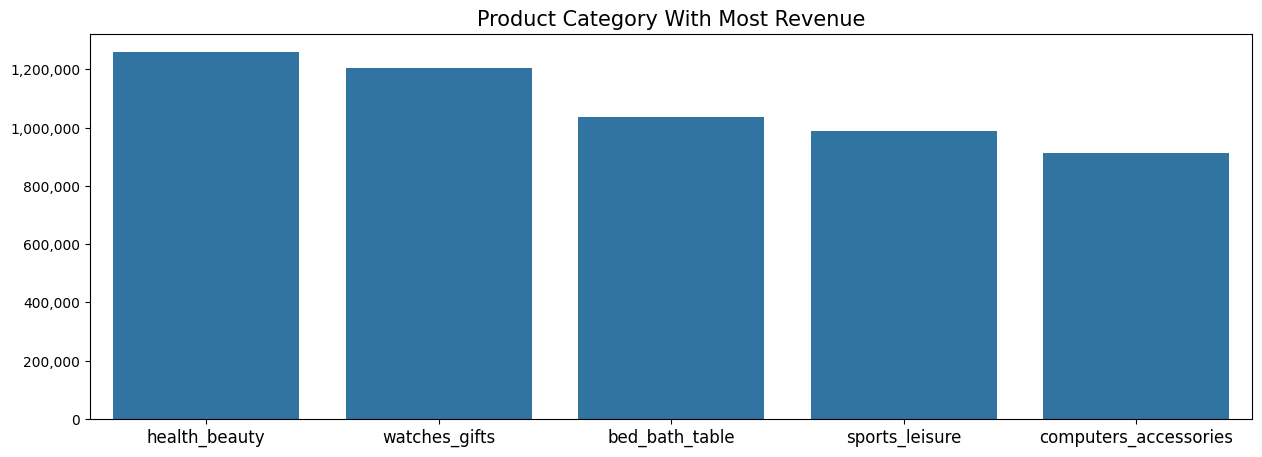

In [82]:
plt.figure(figsize=(15,5))
 
sns.barplot(
    y="price", 
    x="product_category_name",
    data=most_revenue_analyzed.head(5).sort_values(by="price", ascending=False)
)
plt.title("Product Category With Most Revenue", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

### Pertanyaan 2:

Customer lebih sering menggunakan metode pembayaran apa?

In [83]:
most_used_payments

,payment_type,order_id,transaction_count,payment_value
0,credit_card,76505,76795,12542084.19
1,boleto,19784,19784,2869361.27
2,voucher,3866,5775,379436.87
3,debit_card,1528,1529,217989.79
4,not_defined,3,3,0.00


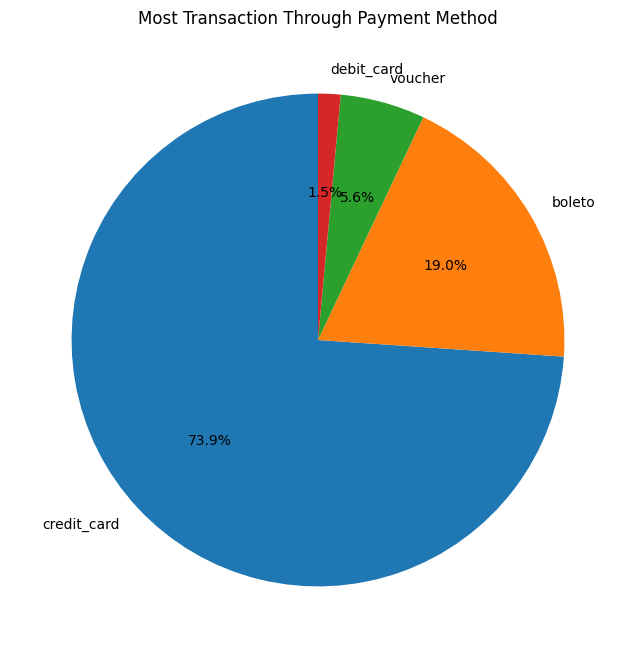

In [84]:
filtered_data = most_used_payments[most_used_payments['payment_type'] != 'not_defined']
plt.figure(figsize=(8, 8))
plt.pie(    
    filtered_data['transaction_count'],
    labels=filtered_data['payment_type'],
    autopct='%1.1f%%',
    startangle=90
    )
plt.title("Most Transaction Through Payment Method")
plt.show()

### Pertanyaan 3:

Berapa revenue yang dihasilkan dari setiap metode pembayaran?

In [85]:
valued_payments

,payment_type,order_id,transaction_count,payment_value
0,credit_card,76505,76795,12542084.19
1,boleto,19784,19784,2869361.27
2,voucher,3866,5775,379436.87
3,debit_card,1528,1529,217989.79
4,not_defined,3,3,0.00


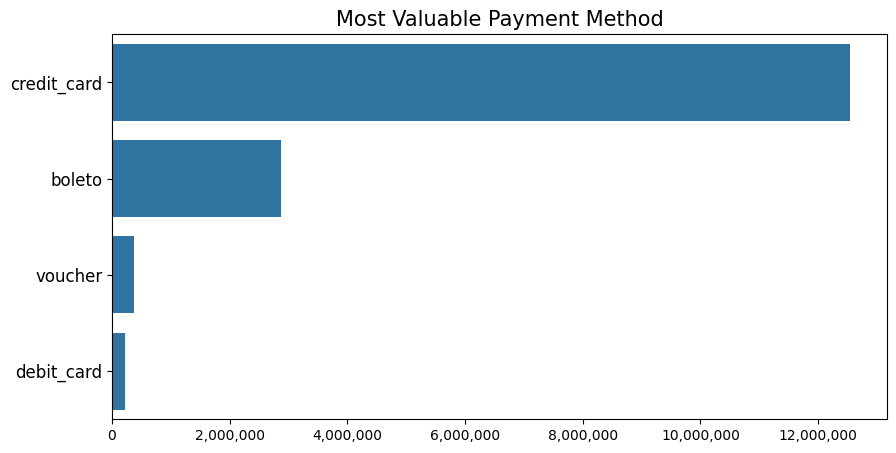

In [86]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="payment_value", 
    y="payment_type",
    data=valued_payments.sort_values(by="payment_value", ascending=False).head(4),
)
plt.title("Most Valuable Payment Method", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.show()

### Pertanyaan 3:

Beberapa tahun terakhir (2018-2017) customer lebih sering membeli kategori produk apa saja?

In [87]:
recent_purchase_analyzed_df

,order_delivered_customer_date,delivered_date,product_id,product_category_name
0,2017-07-31 18:03:02,2017-07-31 18:03:02,21,health_beauty
1,2017-09-02 12:13:03,2017-09-02 12:13:03,20,auto
2,2018-03-05 15:22:27,2018-03-05 15:22:27,20,computers_accessories
3,2017-02-14 10:48:10,2017-02-14 10:48:10,15,garden_tools
4,2017-12-13 20:19:35,2017-12-13 20:19:35,15,furniture_decor
5,2017-12-28 09:05:34,2017-12-28 09:05:34,14,garden_tools
6,2018-03-01 20:47:01,2018-03-01 20:47:01,14,telephony
7,2018-04-23 17:47:44,2018-04-23 17:47:44,13,telephony
8,2018-05-15 19:37:06,2018-05-15 19:37:06,12,housewares
9,2017-10-18 16:19:17,2017-10-18 16:19:17,12,housewares


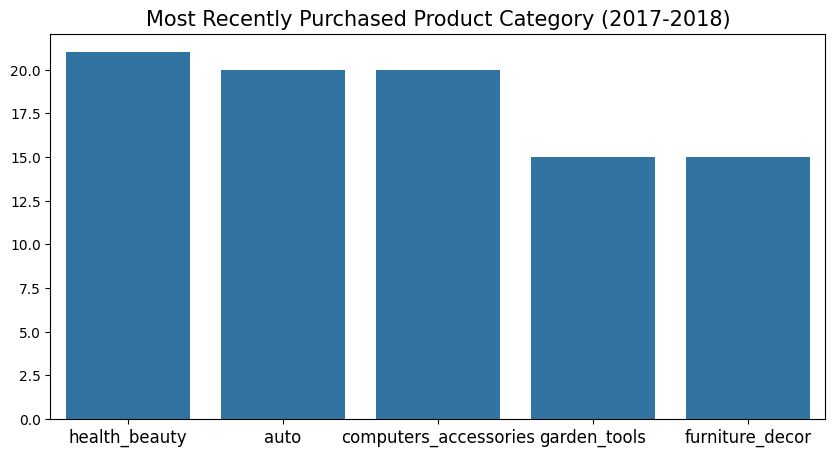

In [88]:
plt.figure(figsize=(10,5))
 
sns.barplot(
    y="product_id", 
    x="product_category_name",
    data=recent_purchase_analyzed_df.head(5).sort_values(by="product_id", ascending=False)
)
plt.title("Most Recently Purchased Product Category (2017-2018)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)


plt.show()

**Insight:**
- Kategori produk dengan revenue terbanyak dipegang oleh health_beauty dengan revenue sebanyak 1258681.34
- Metode pembayaran yang paling sering digunakan dan menghasilkan revenue terbanyak dipegang oleh credit card dengan penggunaan pada transaksi sebanyak 73,9% dari seluruh transaksi dan revenue sebanyak 12542084.19
- Kategori yang baru-baru ini sering dibeli pada tahun (2017-2018) adalah:
1. health_beauty
2. auto
3. computers_accessories
4. garden_tools
5. furniture_decor

## Analisis Lanjutan (Opsional)


- health_beauty menempati posisi pertama sebagai produk kategori dengan revenue terbanyak dan masih sering dibeli akhir-akhir ini yang berarti seller bisa memberikan diskon atau potongan khusus untuk setiap pembelinya untuk meningkatkan loyalitas pelanggan
- credit_card menjadi metode pembayaran paling sering dipakai untuk transaksi dan juga paling banyak menghasilkan transaksi ini bisa jadi dikarenakan credit_card menawarkan cicilan untuk setiap pembeliannya, untuk rekomendasi bisnisnya bisa jadi membebaskan bunga untuk cicilan awal bulan untuk mempertahankan nilai revenue yang dihasilkan credit_card

In [92]:
most_revenue_analyzed.to_csv("most_revenue_analyzed.csv", index=False)
recent_purchase_analyzed_df.to_csv("recent_purchase_analyzed_df.csv", index=False)
valued_payments.to_csv("payments.csv", index=False)

## Conclusion

- Produk kategori yang menghasilkan revenue terbanyak dalam pada dataset ini adalah health_beauty
- Customer lebih sering menggunakan credit card untuk metode pembayaran belanja pada dataset e-commerce ini
- Revenue yang dihasilkan dari setiap metode pembayaran adalah:
1. credit_card: 12542084.19
2. boleto: 2869361.27
3. voucher: 379436.87
4. debit_card: 217989.79
- credit_card menempati posisi pertama selaras dengan banyaknya penggunaan credit_card sebagai metode pembayaran
- Pada beberapa tahun terakhir customer lebih sering membeli kategori produk: health_beauty, auto, computers_accessories, garden_tools dan furniture_decor